In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 학습 데이터를 읽어들인다
train = np.loadtxt('./data/images1.csv', delimiter=',', skiprows=1)  #가로,세로로 가로가 길면 1
train_x = train[:,0:2]
train_y = train[:,2]

In [3]:
# 웨이트를 초기화한다
w = np.random.rand(2)

In [4]:
# 식별함수
def f(x):
    if np.dot(w, x) >= 0:
        return 1
    else:
        return -1

In [5]:
# 반복할 횟수
epoch = 10

# 갱신 횟수
count = 0

In [6]:
# 웨이트를 학습한다
for _ in range(epoch):
    for x, y in zip(train_x, train_y):
        if f(x) != y:
            w = w + y * x
    count += 1
    print('{}회째: w = {}'.format(count, w))    

1회째: w = [ 372.48997148 -593.12220677]
2회째: w = [ 613.48997148 -639.12220677]
3회째: w = [ 613.48997148 -639.12220677]
4회째: w = [ 613.48997148 -639.12220677]
5회째: w = [ 613.48997148 -639.12220677]
6회째: w = [ 613.48997148 -639.12220677]
7회째: w = [ 613.48997148 -639.12220677]
8회째: w = [ 613.48997148 -639.12220677]
9회째: w = [ 613.48997148 -639.12220677]
10회째: w = [ 613.48997148 -639.12220677]


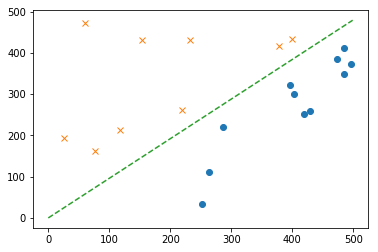

In [7]:
x1 = np.arange(0, 500)
plt.plot(train_x[train_y ==  1, 0], train_x[train_y ==  1, 1], 'o')
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], 'x')
plt.plot(x1, -w[0] / w[1] * x1, linestyle='dashed')
plt.show()


## Perceptron 

In [8]:
def test(logic):
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

def make_neuron(w, b):
    def neuron(*x):
        x = np.array(x)
        z = np.dot(x, w) + b
        y = 1 if z > 0 else 0
        return y
    return neuron


In [9]:
AND = make_neuron(w=np.array([0.5, 0.5]), b=-0.7)
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [10]:
NAND = make_neuron(w=np.array([-0.5, -0.5]), b=0.7)
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


In [11]:
OR = make_neuron(w=np.array([0.5, 0.5]), b=-0.2)
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


In [12]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
test(XOR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0


In [13]:
# %load perceptron.py
import numpy as np

class Perceptron:
    def __init__(self, 학습횟수=10, 학습률=0.1):
        self.epochs = 학습횟수
        self.learning_rate = 학습률
        
    def activation(self, z):
        return np.where(z > 0, 1, -1)
        
    def predict(self, x):
        z = np.dot(x, self.w) + self.b
        return self.activation(z)
        
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0.
        
        error_history = []
        for i in range(self.epochs):
            # 각 샘플에 대해
            sum_square_error = 0
            for xi, yi in zip(X, y):                
                y_pred = self.predict(xi)
                error = yi - y_pred
                sum_square_error += error**2
                # 가중치 갱신
                update = self.learning_rate * error
                self.w += update * xi
                self.b += update
            error_history.append(sum_square_error)
            print('[훈련 {}] Error: {}'.format(
                i, sum_square_error))

In [14]:
import pandas as pd
from pandas import DataFrame, Series


## 붓꽃 데이타 
### 데이타 형태
- 총 150개의 꽃받침(sepal)과 꽃잎(petal)의 크기별 종 데이터
- 품종 : Setosa, versicolor, virginica


In [15]:
iris = pd.read_csv('data/iris.data', header=None)

In [16]:
data = iris[:100]

In [17]:
X = data.values[:,:4].astype(np.float64)
y = data[4]

In [18]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [19]:
y = y.replace(np.unique(y), [1, -1])

In [20]:
y.value_counts()

 1    50
-1    50
Name: 4, dtype: int64

In [21]:
perceptron = Perceptron(학습횟수=10, 학습률=0.1)
error_history = perceptron.fit(X, y.values)

[훈련 0] Error: 8
[훈련 1] Error: 8
[훈련 2] Error: 4
[훈련 3] Error: 0
[훈련 4] Error: 0
[훈련 5] Error: 0
[훈련 6] Error: 0
[훈련 7] Error: 0
[훈련 8] Error: 0
[훈련 9] Error: 0


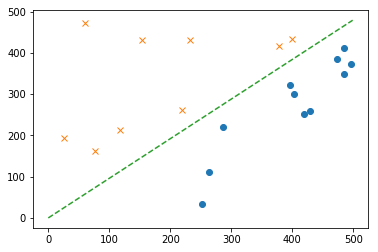

In [22]:
x1 = np.arange(0, 500)
plt.plot(train_x[train_y ==  1, 0], train_x[train_y ==  1, 1], 'o')
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], 'x')
plt.plot(x1, -w[0] / w[1] * x1, linestyle='dashed')
plt.show()